<a href="https://colab.research.google.com/github/Thangasami/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/GPU_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print(tf.test.is_built_with_cuda()) 
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [9]:
def plot_sample(index):
    plt.figure(figsize = (10, 1))
    plt.imshow(X_test[index])

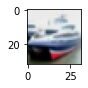

In [26]:
plot_sample(1)

In [10]:
classes = ['airplane','auto','bird','cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
classes[y_train[3][0]]

'deer'

In [9]:
y_train[3]

array([4], dtype=uint8)

In [11]:
strainx = X_train / 255
stestx = X_test / 255

In [12]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(6000, activation='relu'),
    keras.layers.Dense(4000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [18]:
model.fit(strainx, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7954 - accuracy: 0.3595
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5958 - accuracy: 0.4334
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5093 - accuracy: 0.4668
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4408 - accuracy: 0.4913
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3865 - accuracy: 0.5102
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3369 - accuracy: 0.5283
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2928 - accuracy: 0.5438
Epoch 8/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2488 - accuracy: 0.5582
Epoch 9/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2095 - accuracy: 0.5759
Epoch 10/50
1563/1563 [==============================] - 17s 11m

In [30]:
classes[np.argmax(model.predict(stestx)[67])]

'bird'

In [1]:
model.evaluate(stestx, y_test_categorical)

NameError: ignored

In [18]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1500, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'] )
    return model

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(strainx, y_train_categorical, epochs=1)

1563/1563 [==============================] - 128s 82ms/step - loss: 1.8080 - accuracy: 0.3557
1 loop, best of 1: 2min 23s per loop


In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(strainx, y_train_categorical, epochs=1)

1563/1563 [==============================] - 16s 9ms/step - loss: 1.8062 - accuracy: 0.3597
1 loop, best of 1: 16.3 s per loop
